In [1]:
import pandas as pd
#from pyramid.arima import auto_arima
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
data=pd.read_csv('dataset/irondata.csv',parse_dates=['date'])
df=data[:339]
test_data=data[339:]

C:\Users\sumon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


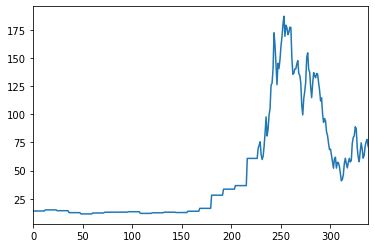

In [3]:
df['price'].plot()
df['Price_lag']=df['price'].shift(1)
df=df.set_index('date')
df['rolling_mean_price']=df['Price_lag'].rolling(2, min_periods=1).sum()
df=df.dropna()


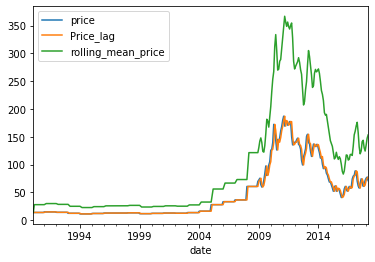

In [4]:
df.plot()
X=df.drop(["price"],axis=1)
y=df['price']
X_train=X[:-1]
y_train=y[:-1]

In [5]:
reg=Lasso().fit(X_train,y_train)
reg.score(X_train,y_train)
#arima = auto_arima(train, error_action='ignore', trace=1,start_p=1, start_q=1, start_P=1, start_Q=1,max_p=5, max_q=5, max_P=5, max_Q=5,seasonal=True, stepwise=True, suppress_warnings=True, D=10, max_D=10)

0.9857674338462136

In [6]:
prediction=[]
test_forecast=X[-1:]

t=test_forecast.values
t=t[0][0]
test_forecast

,Price_lag,rolling_mean_price
date,,
2018-03-31,77.65,153.43


In [7]:
test_forecast

,Price_lag,rolling_mean_price
date,,
2018-03-31,77.65,153.43


In [8]:
t

77.65

In [9]:
for i in range(1,len(test_data)+1):
    m=reg.predict(test_forecast)
    forecastdf=pd.DataFrame(columns=['Price_lag'])
    forecastdf['Price_lag']=[t,m.tolist()[0]]
    print("value = ",forecastdf['Price_lag'])
    print("--------end--------")
    forecastdf['rolling_mean_price']=forecastdf['Price_lag'].rolling(2, min_periods=1).sum()
    print(forecastdf)
    test_forecast=forecastdf[-1:]
    t=m.tolist()[0]
    prediction.append(m.tolist()[0])

value =  0    77.650000
1    77.745807
Name: Price_lag, dtype: float64
--------end--------
   Price_lag  rolling_mean_price
0  77.650000           77.650000
1  77.745807          155.395807
value =  0    77.745807
1    77.650128
Name: Price_lag, dtype: float64
--------end--------
   Price_lag  rolling_mean_price
0  77.745807           77.745807
1  77.650128          155.395935
value =  0    77.650128
1    77.534701
Name: Price_lag, dtype: float64
--------end--------
   Price_lag  rolling_mean_price
0  77.650128           77.650128
1  77.534701          155.184829
value =  0    77.534701
1    77.418153
Name: Price_lag, dtype: float64
--------end--------
   Price_lag  rolling_mean_price
0  77.534701           77.534701
1  77.418153          154.952854
value =  0    77.418153
1    77.302494
Name: Price_lag, dtype: float64
--------end--------
   Price_lag  rolling_mean_price
0  77.418153           77.418153
1  77.302494          154.720647
value =  0    77.302494
1    77.187934
Name: Price

In [10]:
test_data['prediction']=prediction
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'minmax':minmax})

print(forecast_accuracy(test_data['price'],test_data['prediction'] ))
test_data


{'mape': 0.11319108898829944, 'me': -8.757414260079063, 'mae': 8.757414260079063, 'mpe': -0.11319108898829944, 'minmax': 0.11319108898829944}


C:\Users\sumon\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,price,date,prediction
339,66.33,2018-04-30,77.745807
340,66.63,2018-05-31,77.650128
341,66.86,2018-06-30,77.534701
342,67.05,2018-07-31,77.418153
343,68.02,2018-08-31,77.302494
344,68.80,2018-09-30,77.187934
345,72.02,2018-10-31,77.074485
346,72.30,2018-11-30,76.962140
347,68.90,2018-12-31,76.850886
